# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

### Loading the dataset

In [119]:
# load the dataset
data = pd.read_csv("used_device_data.csv")

<IPython.core.display.Javascript object>

## Data Overview

### Displaying the first few rows of the dataset

In [120]:
# view the first 5 rows of the dataset
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

* The dataset has 15 columns as mentioned in the Data Dictionary. Data in each row corresponds to the information regarding each unique used device.
* A significant portion of the devices in the dataset operate on Android.
* Many devices are compatible with both 4G and 5G connectivity.
* There are devices that have been utilized for less than a year, indicating relatively short periods of usage for certain devices in this dataset.


### Checking the shape of the dataset

In [19]:
# view the shape of the dataset
data.shape

(3454, 15)

<IPython.core.display.Javascript object>

* The dataset contains information (15 attributes) about 3454 devices.

###  Checking the data types of the columns for the dataset

In [20]:
# check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

* There are 4 object type columns and 11 numerical (*float* and *int* type) columns. The numerical columns are `screen_size`, `main_camera_mp`, `selfie_camer_mp`, `int_memory`, `ram`, `battery`, `weight`, `release_year`, `days_used`, `normalized_used_price` and `normalized_new_price`.
* The target variable is the normalized price of a used device, which is of *float* type.
* There are some columns have less entries than other columns (less than 3454) which indicates the presence of missing values in the data.

### Getting the statistical summary for the numerical variables

In [54]:
# Get the numerical summary statistics
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

* The normalized price of a used device varies from 1.54-6.62 euros, with an average value of approximately 4 euros.
* The number of days the devices have been used ranges from 91 to 1094 days, suggesting a diverse range of usage durations.
* The dataset includes 34 unique brands, with the most frequent brand being labeled as "Others," indicating a significant number of devices without a specific brand name.
* *Andriod* is the predominant operating system among the devices in the dataset.
* The latest released device is from 2020 while the earliest was in 2013. 
* The mean energy capacity of the devices' battery is 3133.4 mAh, with a median value of 3000 mAh. There is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column. 
* Int_memory has a mean of 54.57 GB, with a median value of 32 GB. There is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column.
* There is a significant weight range observed for the devices, spanning from 69 to 855 grams, which can be attributed to the inclusion of both phones and tablets. There is also a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column. 

### Checking for duplicate values

In [22]:
# Checking for duplicate entries in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There are no duplicated entries in the dataset.

### Check for missing values

In [23]:
# checking for missing values
data.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

* There are missing values in 6 columns of the dataset.
* These missing values will be treated after understanding the distribution of features in the data, the relationships that exist in the data. This will help imputing these values more effectively.

In [121]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [41]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [42]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

**`normalized_used_price`**

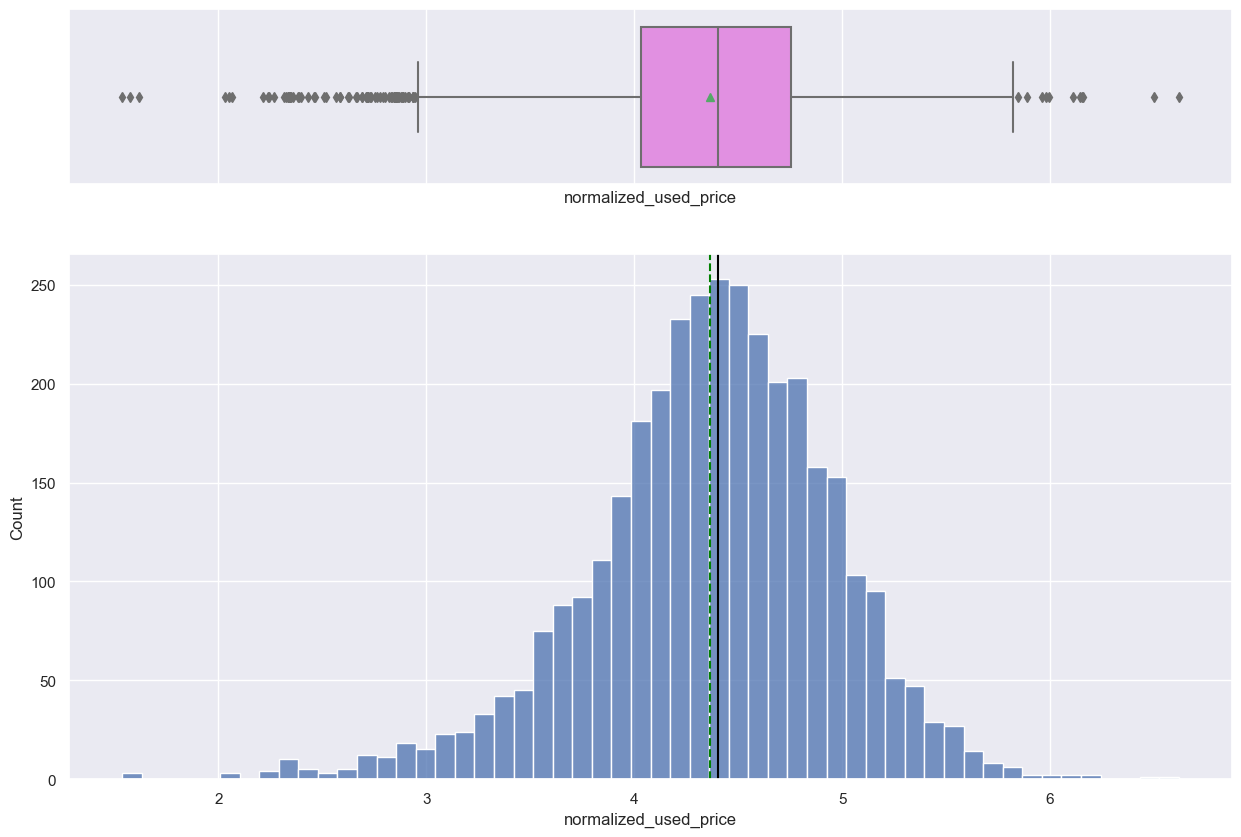

<IPython.core.display.Javascript object>

In [43]:
# Create a histogram and boxplot for 'normalized_used_price'
histogram_boxplot(df, "normalized_used_price")

* The mean 'normalized_used_price' is almost the same as median value, indicating that the data is evenly distributed around the center point, which is around 4.36 euros.
* There are many outliers present in this variable.
* Based on the distribution, we can assume that this variable is close to normal distribution with long tails.

**`normalized_new_price`**

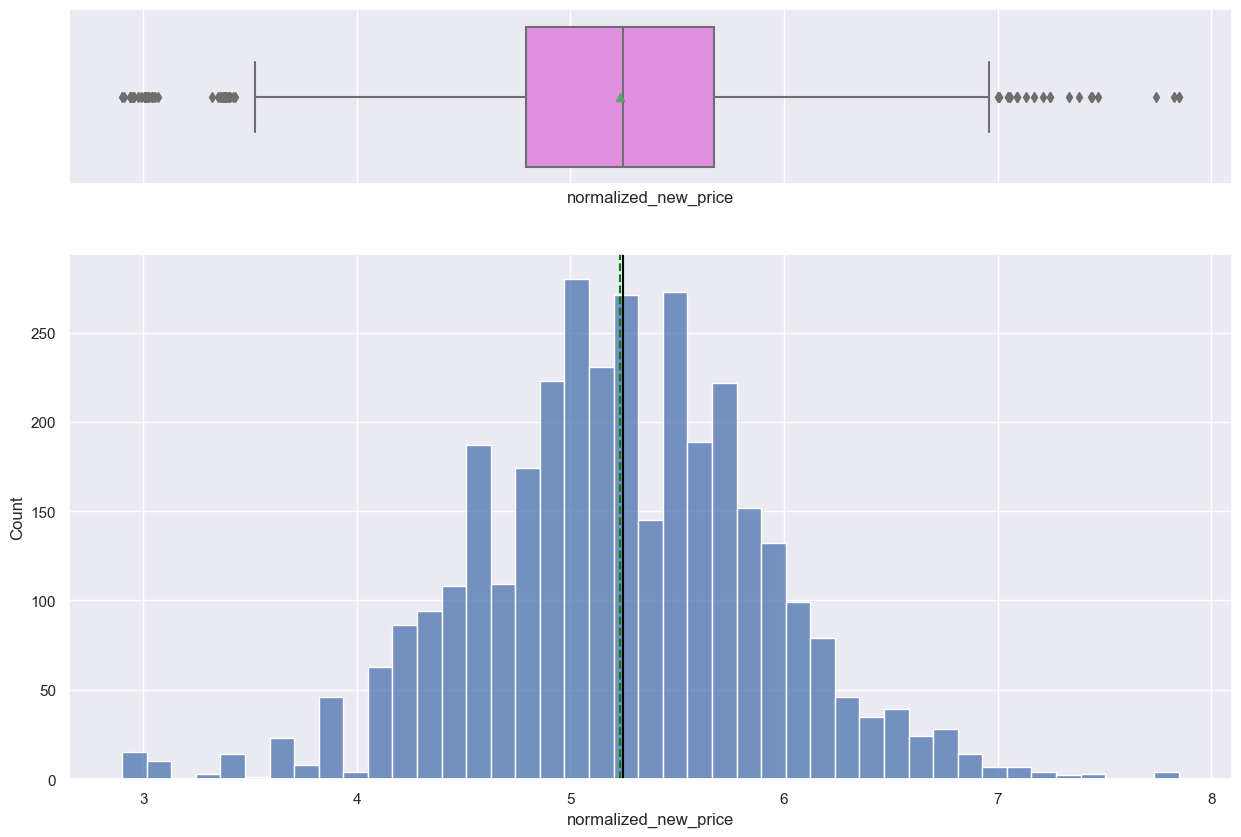

<IPython.core.display.Javascript object>

In [44]:
# Create a histogram and boxplot for 'normalized_new_price'
histogram_boxplot(df, "normalized_new_price")

* The mean 'normalized_new_price' is almost the same as the median value, indicating that the data is evenly distributed around the center point, which is around 5.23 euros.
* There are multiple modes in this data range from 5-5.5 euros.
* There are many outliers present in this variable.
* Based on the distribution, we can assume that this variable is close to normal distribution with long tails.

**`screen_size`**

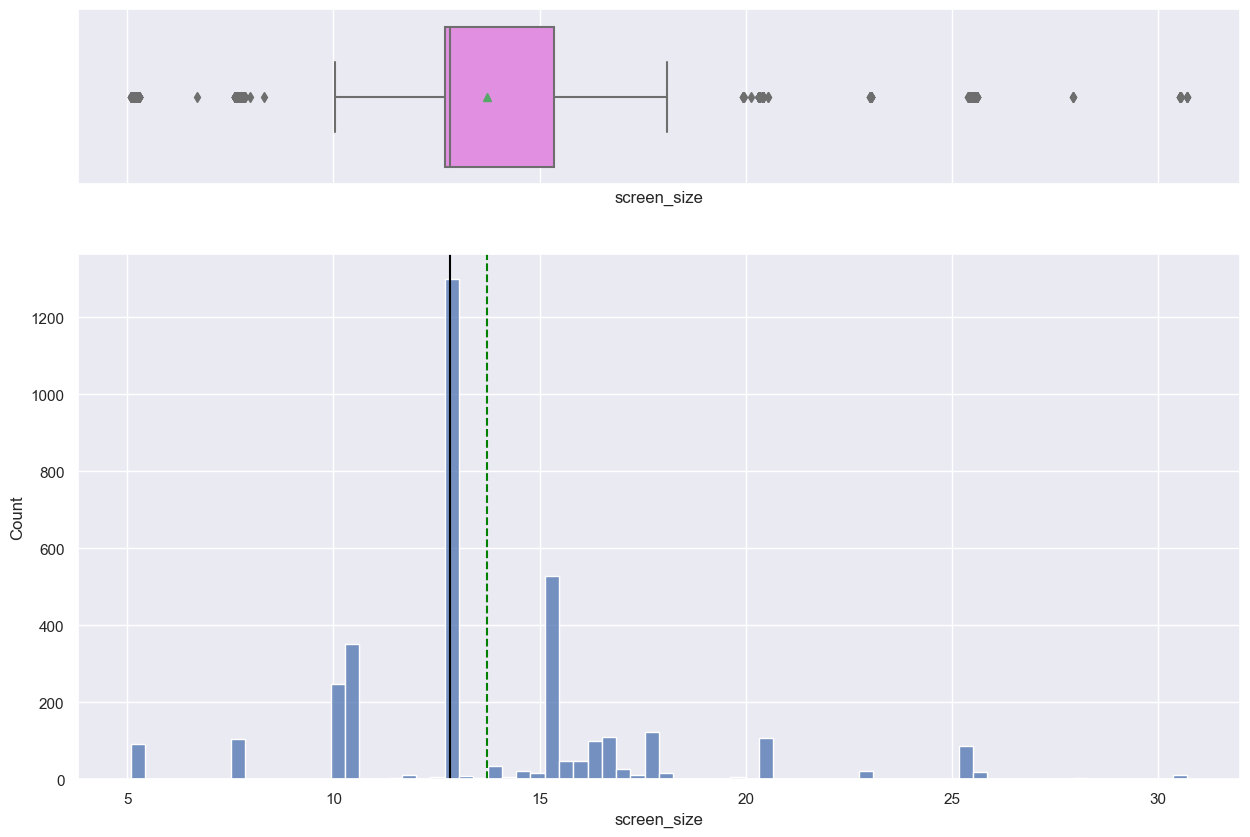

<IPython.core.display.Javascript object>

In [46]:
# Create a histogram and boxplot for 'screen_size'
histogram_boxplot(df, "screen_size")

* This plot has a single peak at ~12.5, indicating that a significant number of devices have a screen size of  12.5 cm. 
* There are some outliers present in this variable.

**`main_camera_mp`**

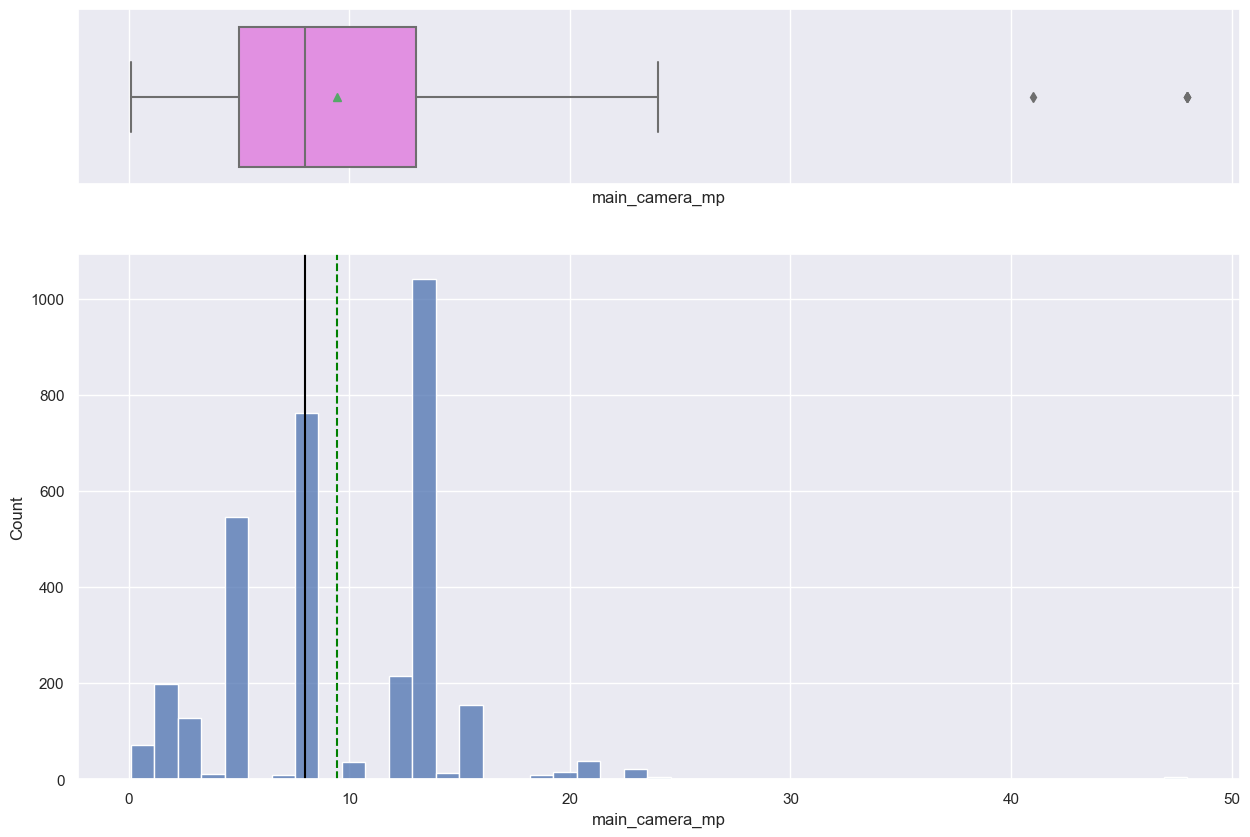

<IPython.core.display.Javascript object>

In [50]:
# Create a histogram and boxplot for 'main_camera_mp'
histogram_boxplot(df, "main_camera_mp")

* This plot has a peak at ~13, indicating a significant number of the devices have a main camera resolution with 13 megapixels. 
* Most of the devices have a main camera resolution equal to or below 13 megapixels.
* A small number of devices offer a main camera resolution exceeding 20 megapixels.
* There are a few outliers present in this variable. 

**`selfie_camera_mp`**

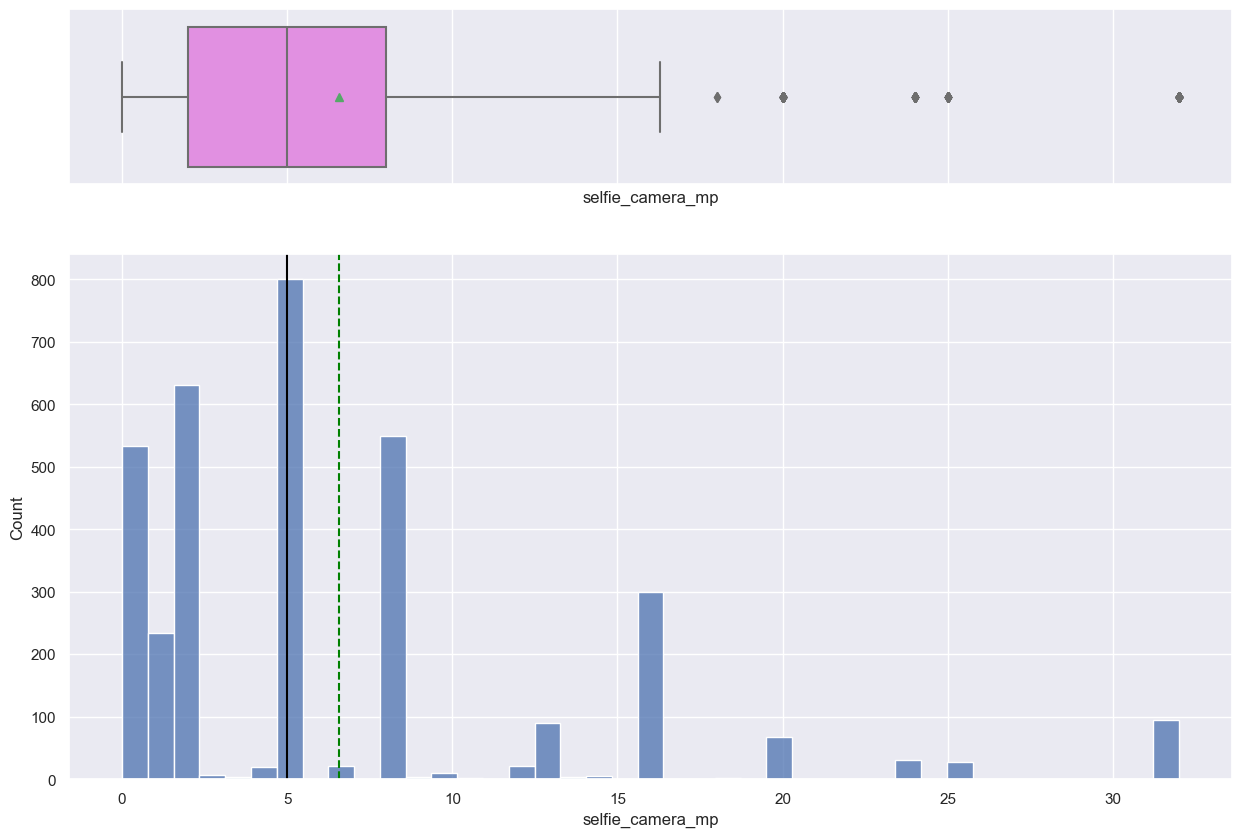

<IPython.core.display.Javascript object>

In [55]:
# Create a histogram and boxplot for 'selfie_camera_mp'
histogram_boxplot(df, "selfie_camera_mp")

* This distribution is slightly right-skewed, and most of the devices have a selfie camera resolution less than 16 megapixels.
* This plot has a peak at ~5, indicating a significant number of the devices have a selfie camera resolution with 5 megapixels.
* A small number of devices offer a selfie camera resolution exceeding 30 megapixels, this suggests the presence of high-resolution selfie cameras in select devices.
* There are a few outliers present in this variable.

**`int_memory`**

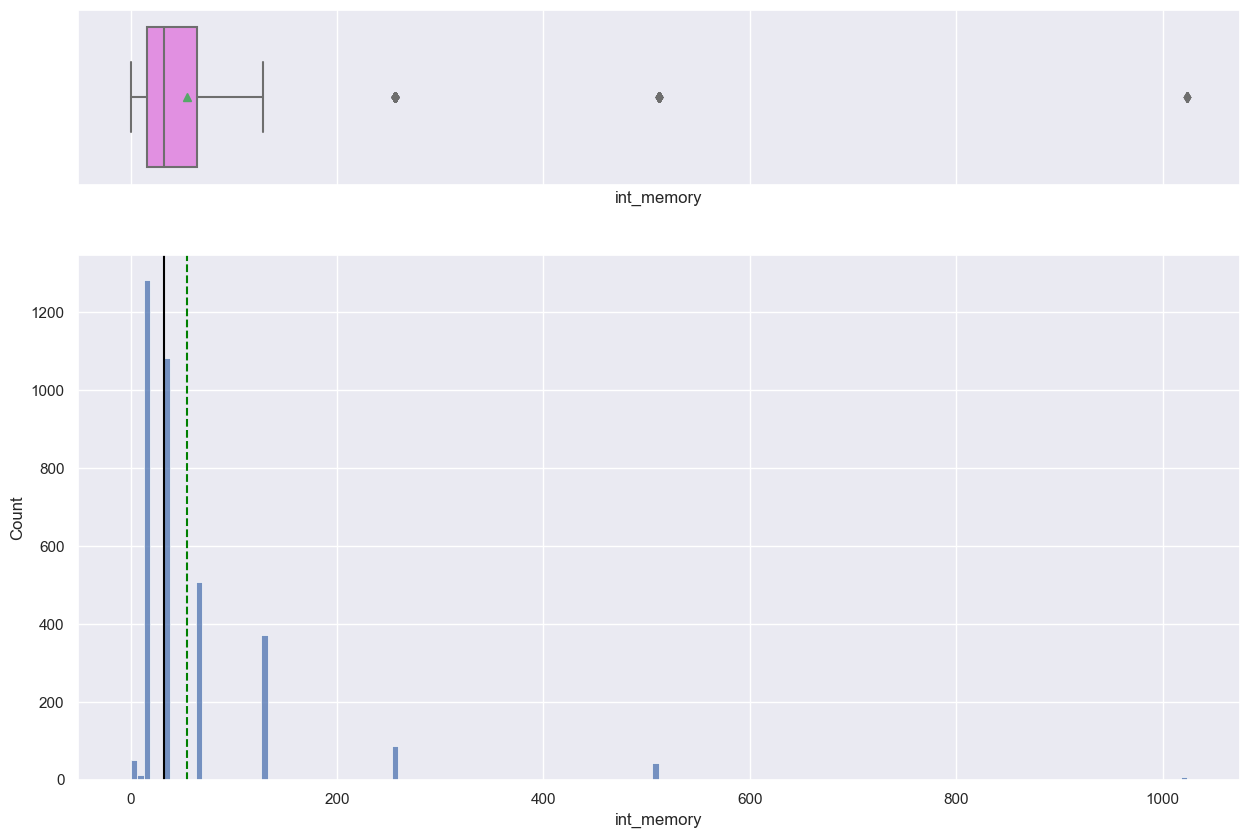

<IPython.core.display.Javascript object>

In [58]:
# Create a histogram and boxplot for 'int_memory'
histogram_boxplot(df, "int_memory")

* This distribution is a heavily right-skewed, indicating that the majority of the devices have relatively lower storage capacities (less than 150 GB).
* This plot is bi-modal with peaks around ~16 and ~32, indicating a significant number of devices in the dataset possess 16 GB or 32 GB of internal memory. 
* There are a few outliers present in this variable. Specifically, values above 250 GB are represented as outliers in the boxplot.

**`ram`**

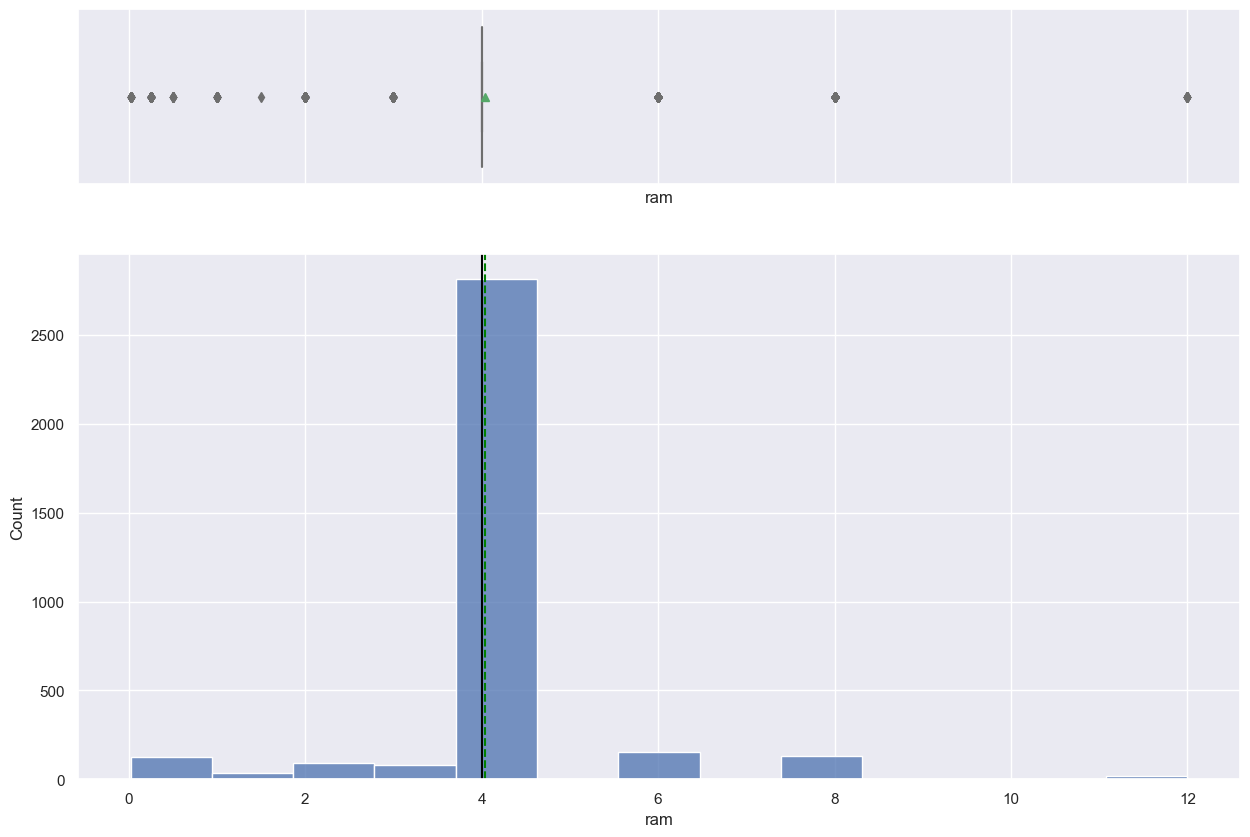

<IPython.core.display.Javascript object>

In [61]:
# Create a histogram and boxplot for 'ram'
histogram_boxplot(df, "ram")

* This is a unimodal plot, which has a single peak at 4 GM.
* Around 80% of devices in this dataset has 4 GM ram.
* The remaining values in this variable are considered as outliers.

**`weight`**

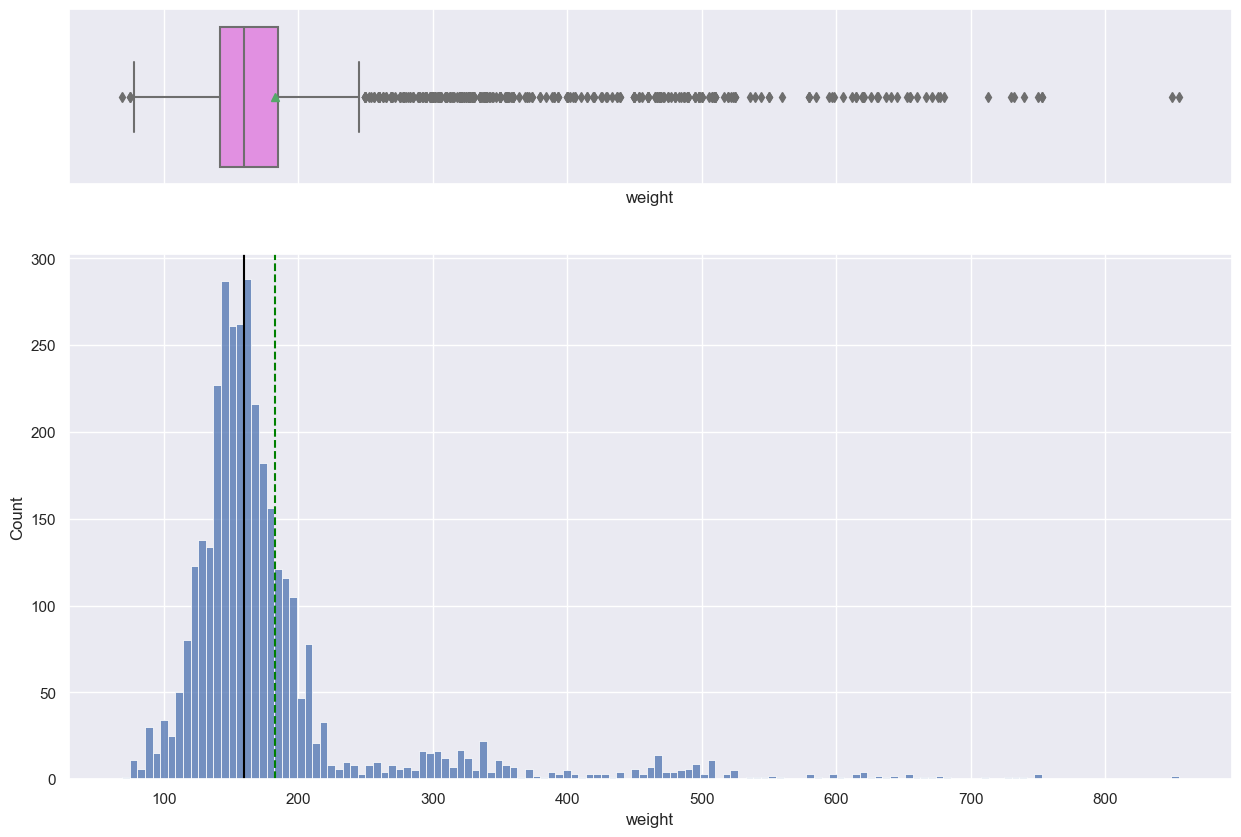

<IPython.core.display.Javascript object>

In [67]:
# Create a histogram and boxplot for 'weight'
histogram_boxplot(df, "weight")

* This distribution is heavily right-skewed, and most of the devices have weight less than 200 grams.
* There are many outliers present in this variable.

**`battery`**

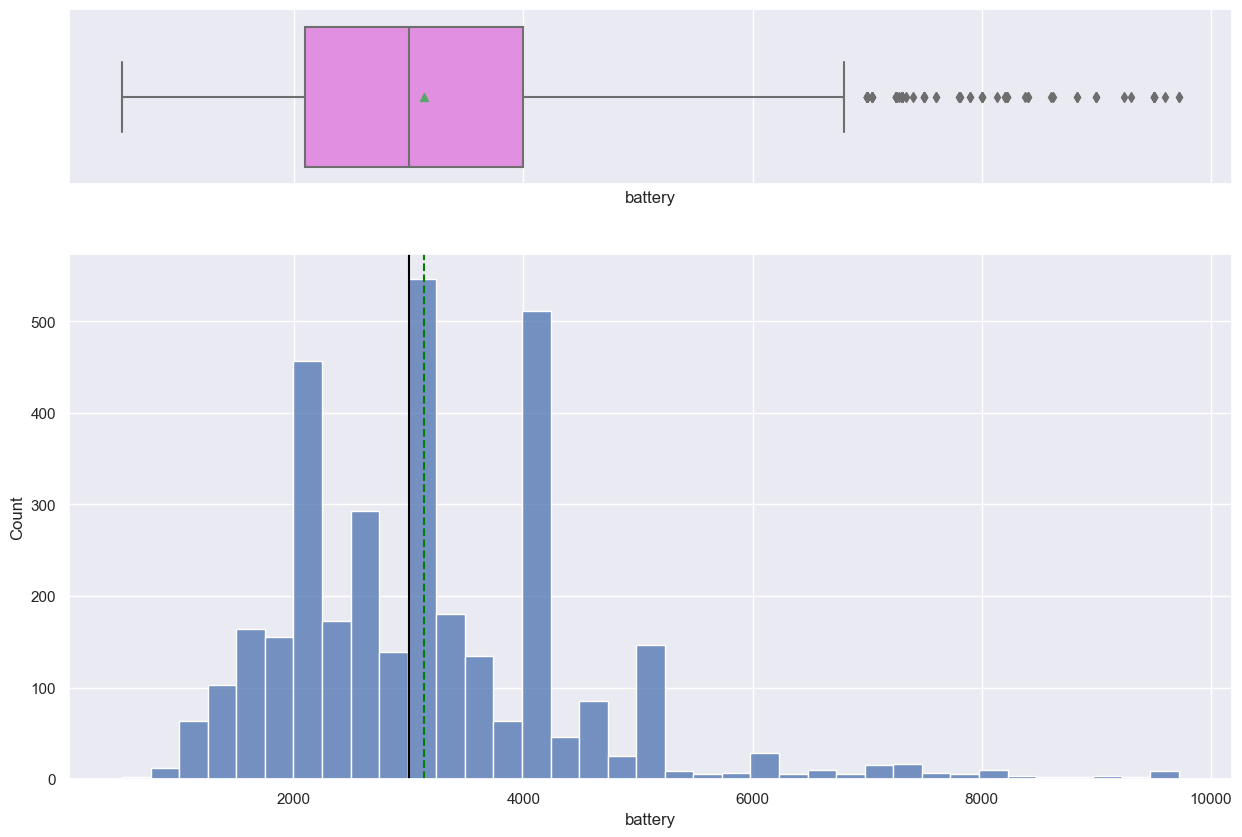

<IPython.core.display.Javascript object>

In [73]:
# Create a histogram and boxplot for 'battery'
histogram_boxplot(df, "battery")

* This distribution is slightly right-skewed, and most of the devices have energy capacity less than 5000 mAh.
* This plot is multi-modal. It has peaks around ~3000, ~4000 and ~2000.
* Battery with more than 7000 mAh are represented as outliers by the boxplot.

**`days_used`**

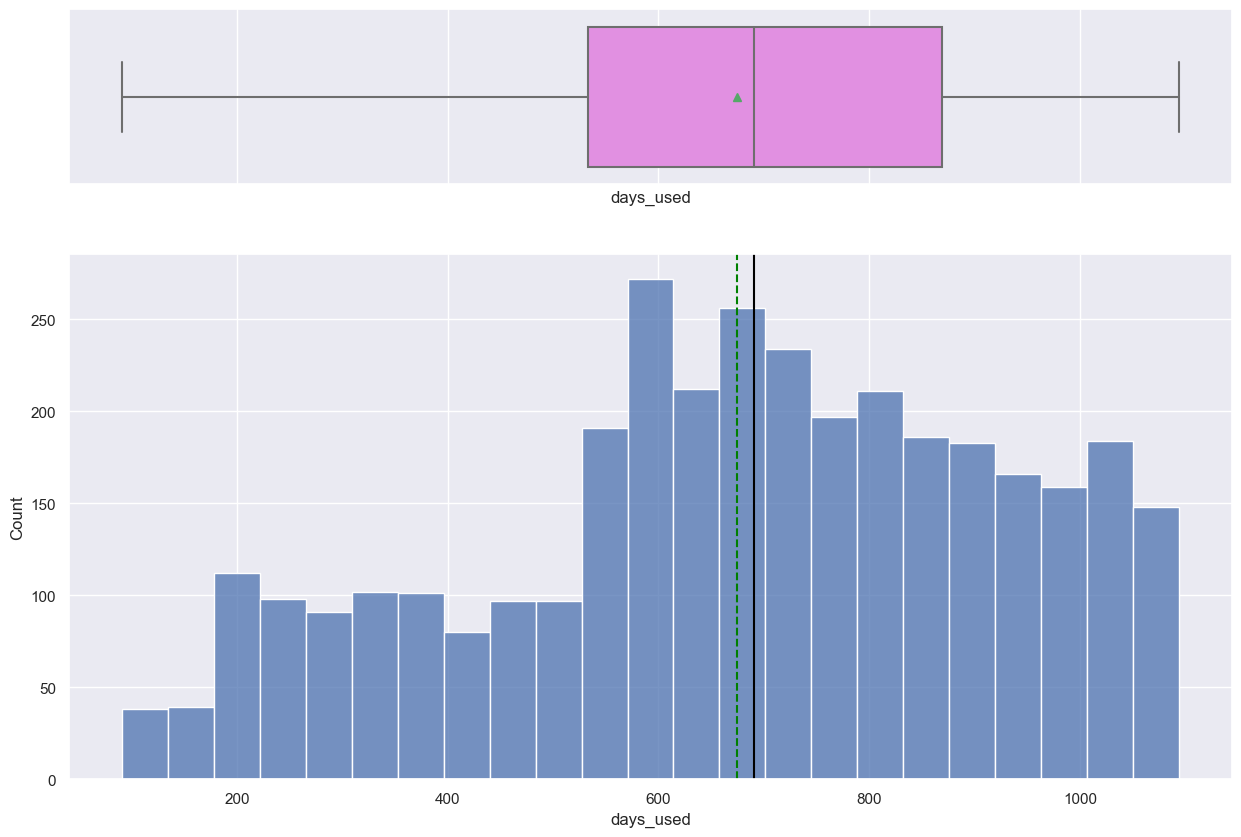

<IPython.core.display.Javascript object>

In [79]:
# Create a histogram and boxplot for 'days_used'
histogram_boxplot(df, "days_used")

* This distribution is slightly left-skewed.
* This plot is multi-modal with peaks around ~578, ~574 and ~600.
* There are no outliers present in this variable.

**`brand_name`**

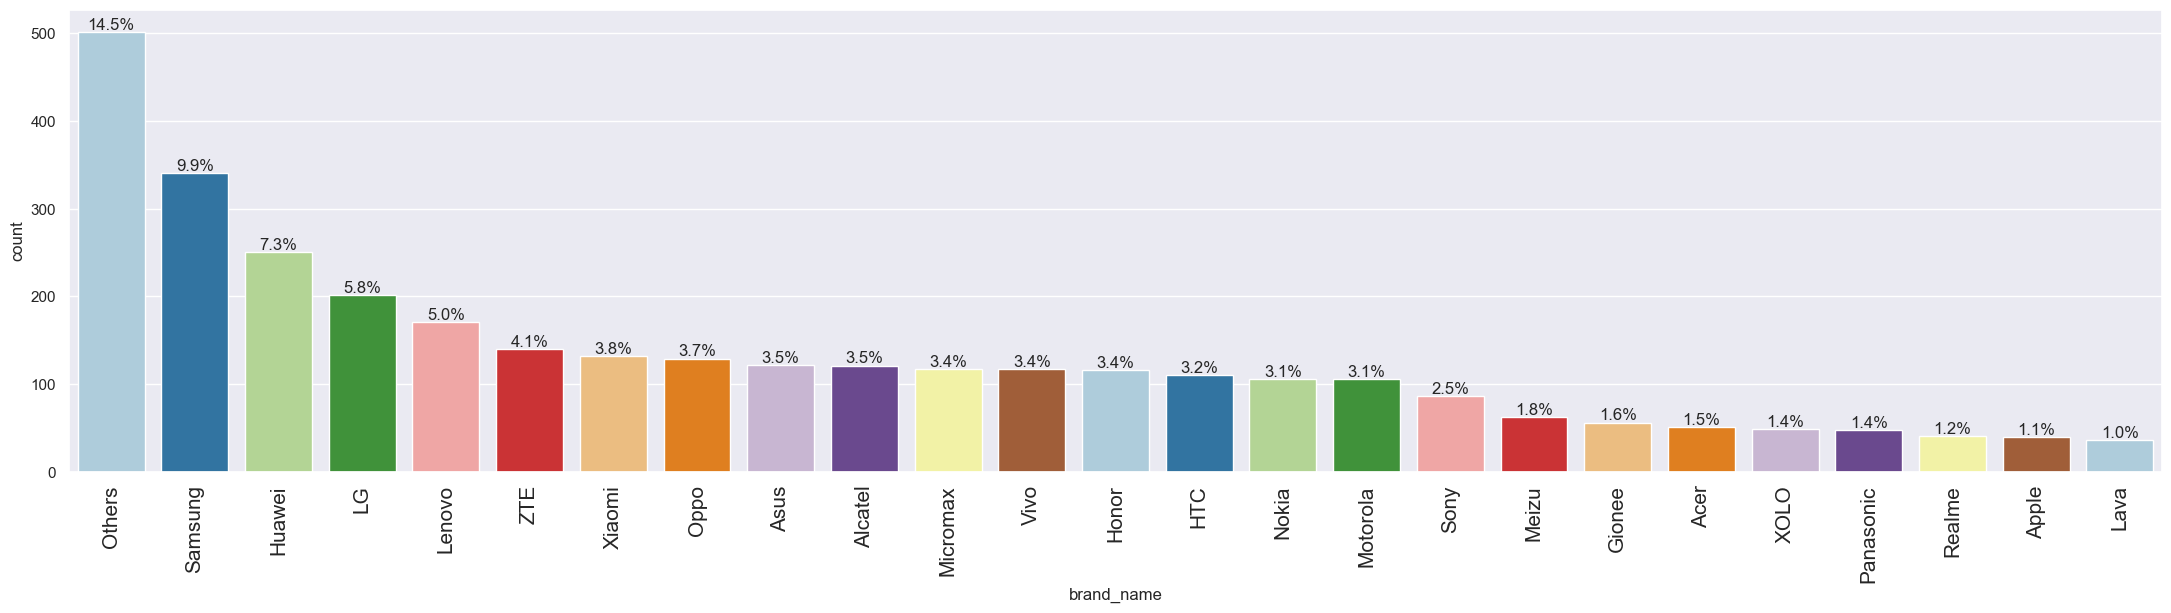

<IPython.core.display.Javascript object>

In [95]:
# Create a barplot for 'brand_name'
labeled_barplot(df, "brand_name", perc=True, n=25)

* There are total 34 brands in this variable.
* A high proportion (14.5%) of the brands do not have a brand name recorded in this dataset.
* Brand names such as *Samsung*, *Huawei*, *LG*, and *Lenovo* have high recorded entries in this dataset. 
* *Apple* has a very low representation (1.1%) in this variable. This could potentially be attributed to Apple's distinct and regulated refurbished process, which sets it apart from the rest of the brands in the dataset.

**`os`**

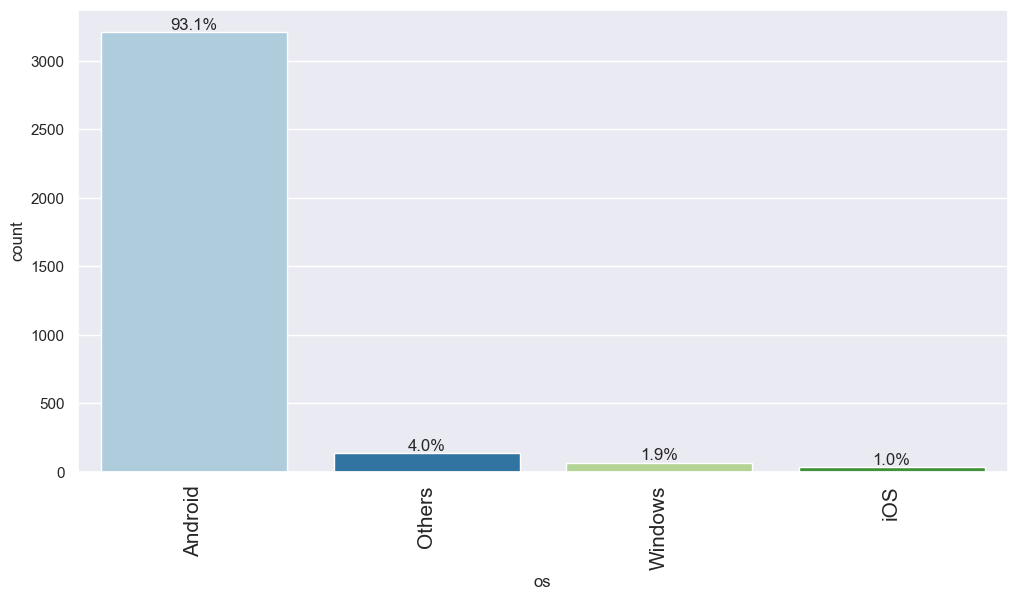

<IPython.core.display.Javascript object>

In [97]:
# Create a barplot for `os`
labeled_barplot(df, "os", perc=True, n=10)

* About 93% of the devices run on *Andriod*.
* Similar to the 'brand_name', the presence of iOS, which exclusively operates on *Apple* devices, is observed to comprise a mere 1% of the data. 

**`4g`**

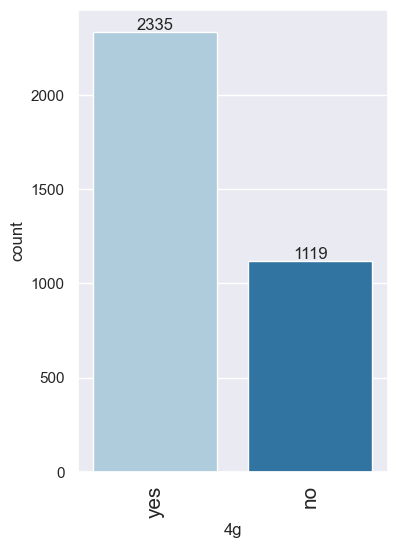

<IPython.core.display.Javascript object>

In [98]:
# Create a barplot for `4g`
labeled_barplot(df, "4g")

* The '4g' variable consists of 2 unique categorical values - no and yes.
* The distribution shows that the number of 4G devices almost double the non 4G devices.

**`5g`**

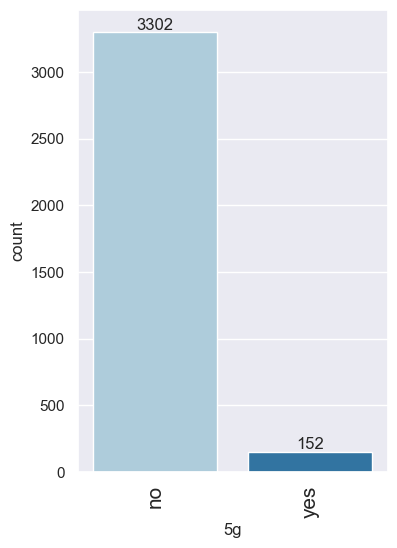

<IPython.core.display.Javascript object>

In [99]:
# Create a barplot for `5g`
labeled_barplot(df, "5g")

* The '5g' variable consists of 2 unique categorical values - no and yes.
* The distribution indicates a limited presence of devices that offer 5G connectivity.

**`release_year`**

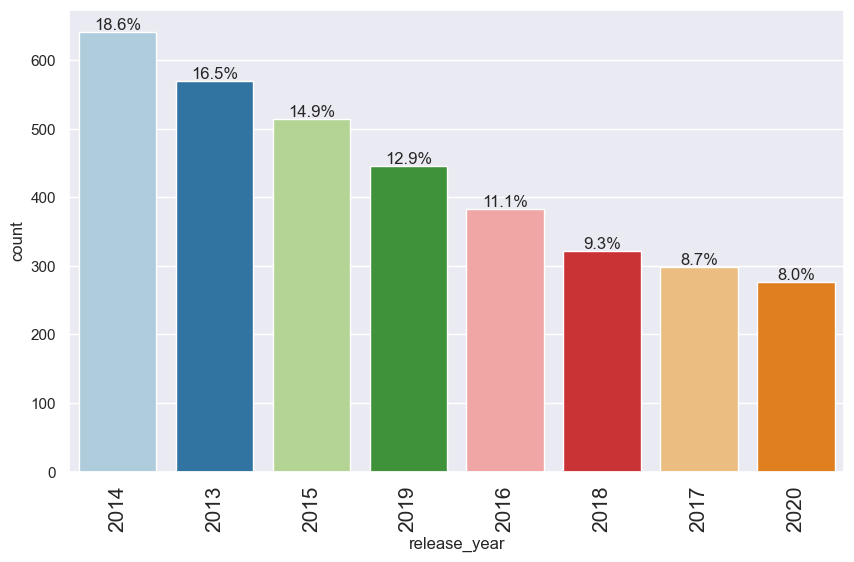

<IPython.core.display.Javascript object>

In [331]:
# Create a barplot for `release_year`
labeled_barplot(df, "release_year", perc=True)

* Devices in this dataset are released from 2013 to 2020.
* Approximately 50% of the devices included in the dataset were initially released in 2015 or prior.
* In this dataset, there is a greater number of devices were introduced in the earlier years compared to recent years. This makes sense because a larger proportion of used devices originate from earlier releases.

### Bivariate Analysis


**Correlation Check**

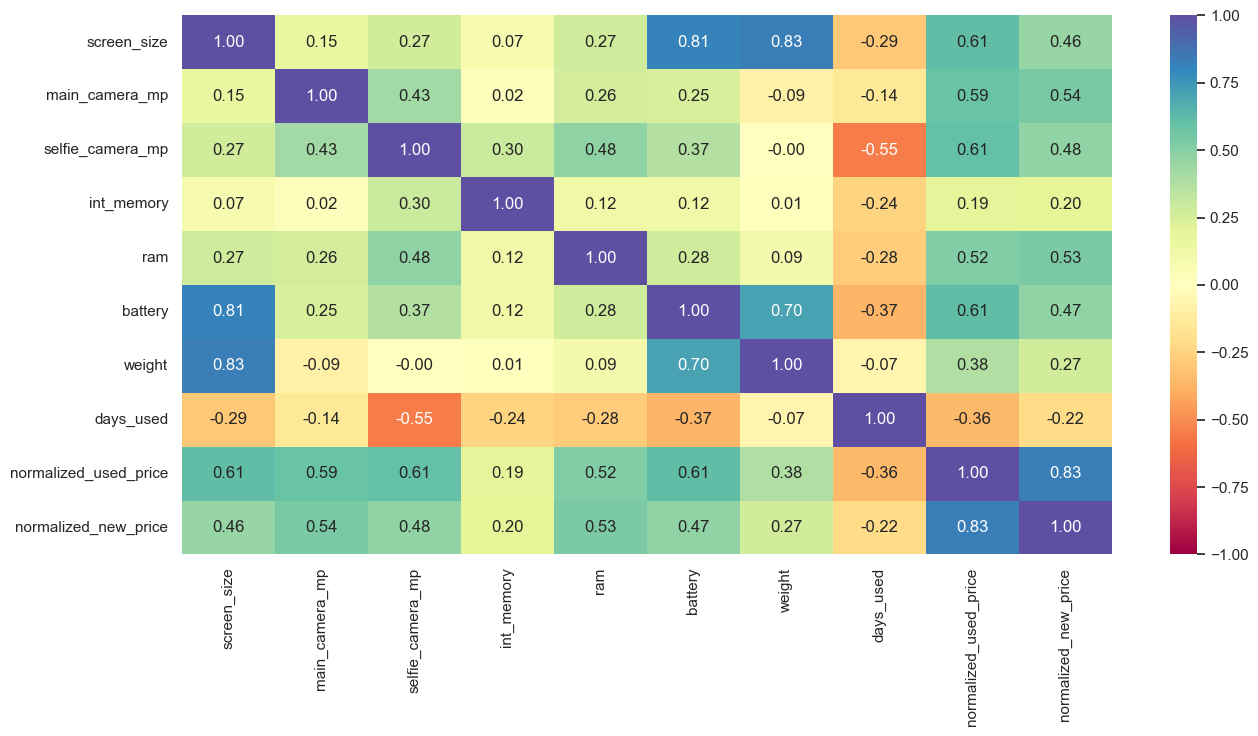

<IPython.core.display.Javascript object>

In [154]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The normalized price of a used device demonstrates a strong positive correlation with the normalized price of a new device of the same model. This is logical, as higher prices for new devices generally result in higher prices for used devices.
* The normalized price of a used device demonstrates moderate positive correlations with various features, including the screen size, resolution of the rear and front camera, amount of RAM, and energy capacity of the battery. This suggests that these factors contribute to the overall value and pricing of a used device.
* The screen size of a device displays a significant positive correlation with the energy capacity of its battery and its weight. This indicates that larger screens are often accompanied by higher energy needs, therefore, a heavier overall device.
* The resolution of a device's front camera shows a moderate negative correlation with the number of days the device has been used. This makes sense as older devices generally do not offer front cameras with as high resolution or advanced capabilities as more recent models. 

#### `brand_name` vs `ram`

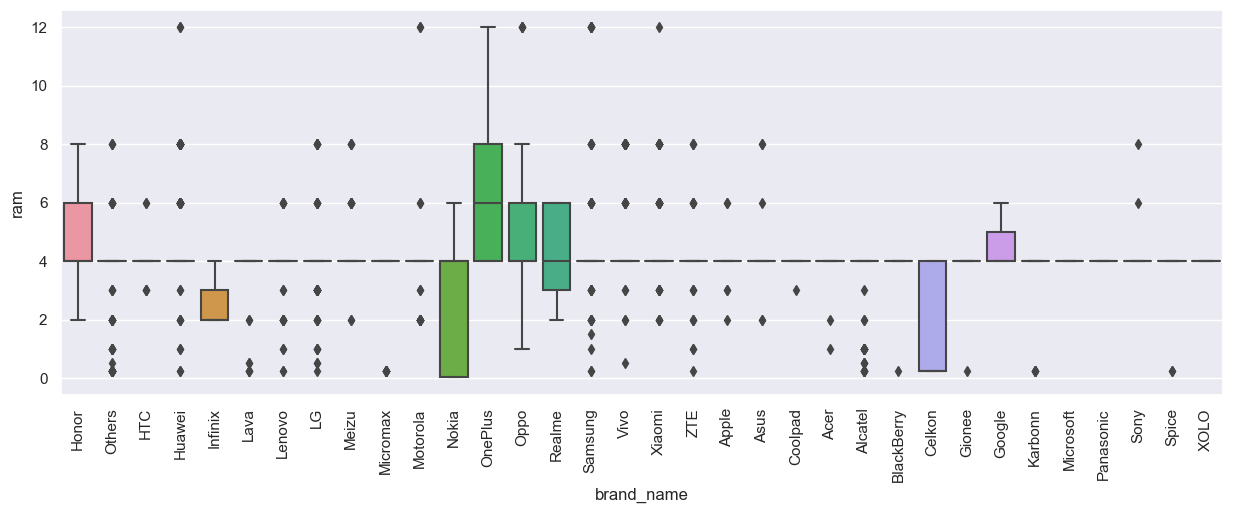

<IPython.core.display.Javascript object>

In [155]:
# Create a boxplot for 'brand name' and 'ram'
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

* The distribution shows the diversity of brands in producing devices with RAM ranging from 0.2 to 12 GB.
* More than 75% of the devices across all brands in this dataset feature 4 GB of RAM. This observation indicates the prevalence of 4 GB RAM as a standard specification for electronic devices, and its suitability for most everyday tasks.
* There are 50% of OnePlus devices are equipped with 6 GB or higher RAM. This suggests that OnePlus devices, on average, provide users with a generous amount of RAM compare to other brands.
* There are also a few brands, namely Huawei, Motorola, OnePlus, Oppo, Samsung, and Xiaomi, that offer devices with a significant 12 GB of RAM. These devices, more likely phones with big screens or tablets, are designed to handle demanding computational tasks and run resource-intensive programs.
* Many brands also have devices with very low RAM (0.2-2 GB). These devices could be released from the earlier years.

####  `brand_name` vs `screen_size` 

In [224]:
# Create a new dataframe that contains devices with screen size larger than 6 inches
df_large_screen = df[df.screen_size > 15.24]
df_large_screen.shape

(1099, 15)

<IPython.core.display.Javascript object>

In [390]:
# Get the normalized value 
noramlized_large_screen = df_large_screen.shape[0] / df.shape[0] * 100
noramlized_large_screen

31.818181818181817

<IPython.core.display.Javascript object>

<Figure size 5500x10000 with 0 Axes>

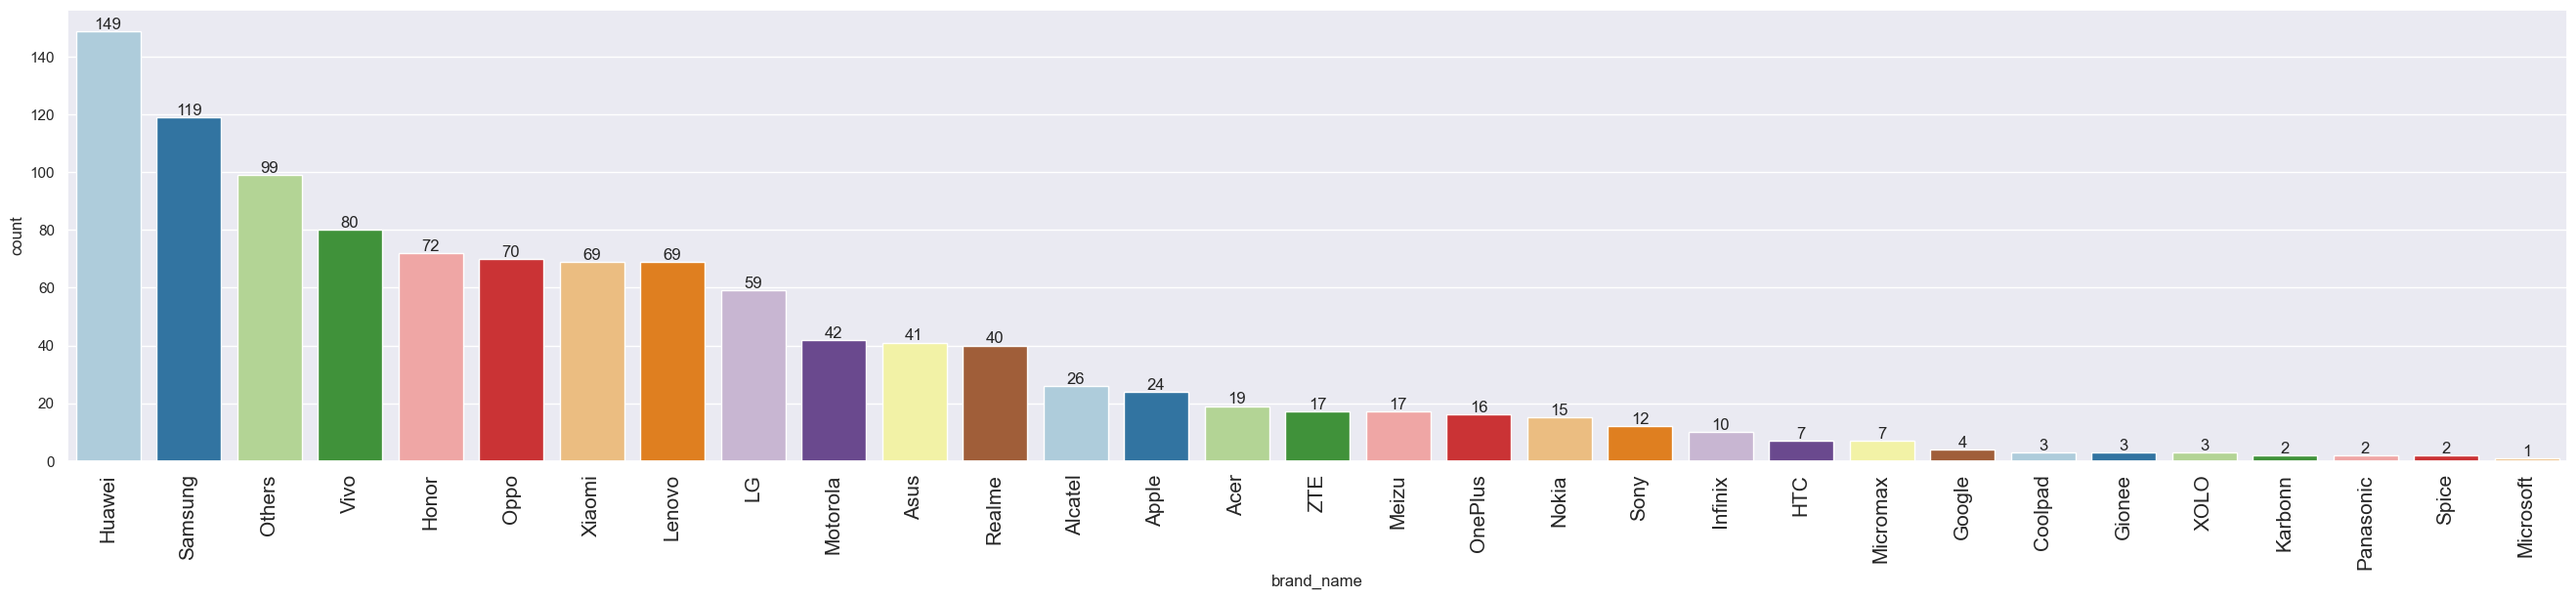

<IPython.core.display.Javascript object>

In [237]:
# Create a barplot for 'brand_name' in large screen dataframe
labeled_barplot(df_large_screen, "brand_name")

* Among the 34 brands in the dataset, 31 of them offer devices with large screens (>6 inches).
* There are 1009 (31.82%) devices across different brands with a screen size larger than 6 inches (15.24 cm).
* Among these brands that make devices with large screens, Huawei, Samsung and some unknown brands ranked the highest. It is noteworthy that the top 7 brands are predominantly of Asian origin, indicating their focus on producing devices with larger displays.
* Apple only ranks 14th among brands that make large screens. 

#### `brand_name` vs `selfie_camera_MP`

In [239]:
# Create a new dataframe that contains devices with selfie cameras greater than 8 MP.
df_selfie_camera = df[df["selfie_camera_mp"] > 8]
df_selfie_camera.shape

(655, 15)

<IPython.core.display.Javascript object>

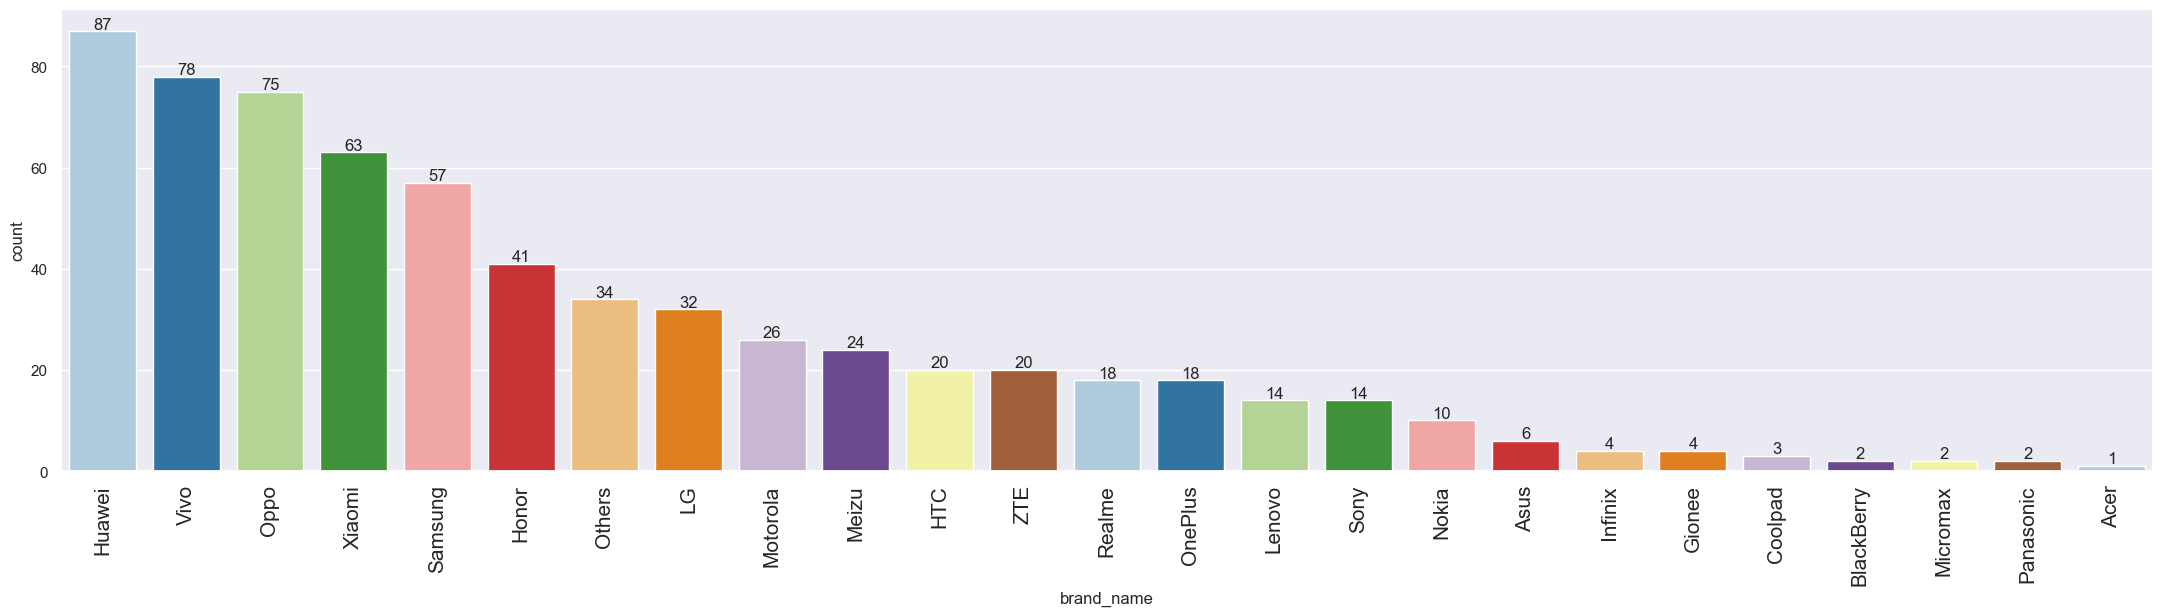

<IPython.core.display.Javascript object>

In [241]:
# Create a barplot for 'brand_name' in selfie camera dataframe
labeled_barplot(df_selfie_camera, "brand_name")

* Among the 34 brands in the dataset, 25 of them offer devices with high resolution selfie cameras exceeding 8 MP. 
* The Asian brands that make devices with larger screens also excel in producing devices with high resolution selfie cameras, which indicates their emphasis on delivering devices that enhance entertainment and self-expression for users.
* Surprisingly, Apple devices, despite their reputation, do not feature prominently in terms of high selfie camera MP in this dataset.

#### `brand_name` vs `main_camera_MP`

In [242]:
# Create a new dataframe that contains devices with selfie cameras greater than 16 MP.
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

<IPython.core.display.Javascript object>

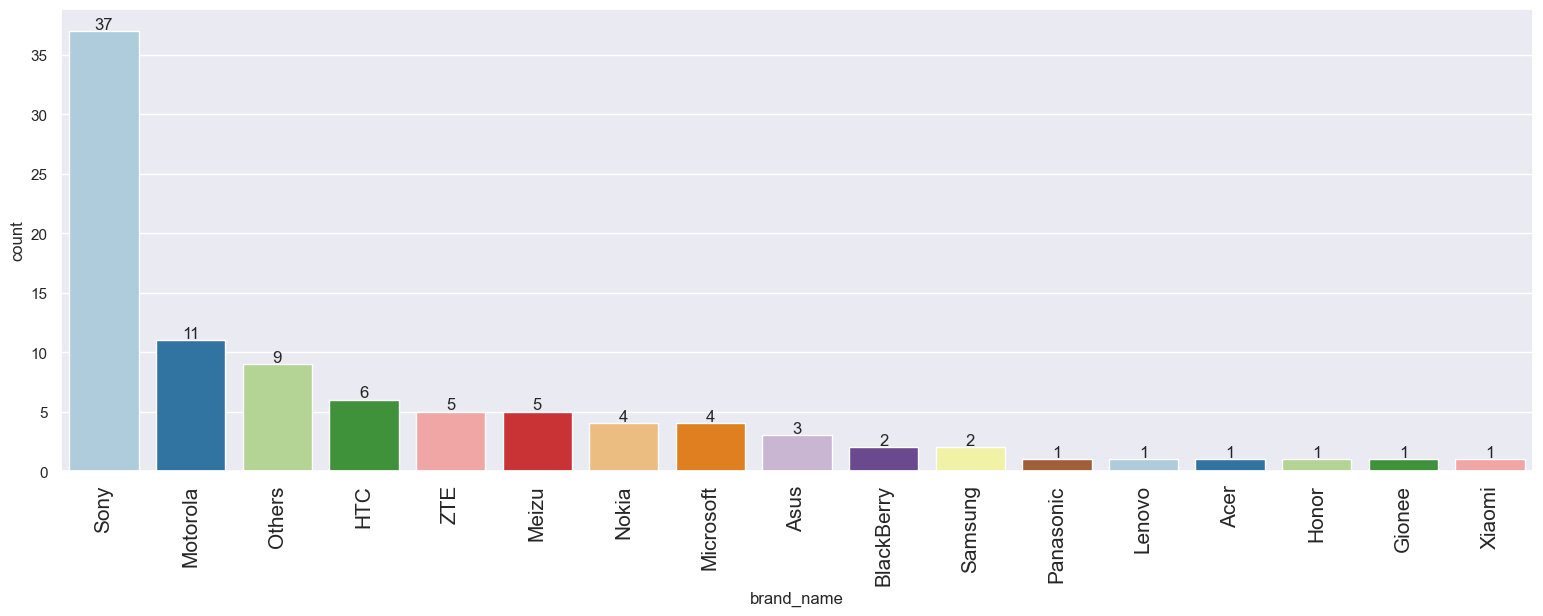

<IPython.core.display.Javascript object>

In [243]:
# Create a barplot for 'brand_name' in main camera dataframe
labeled_barplot(df_main_camera, "brand_name")

* Among the 34 brands in the dataset, 17 of them offer devices with high resolution main cameras exceeding 16 MP. 
* Sony, a brand recognized for its expertise in manufacturing high-standard photography cameras, notably stands out among the brands that produce devices with high main camera MP. 
* Surprisingly, Apple devices, despite their reputation, do not feature prominently in terms of high main camera MP in this dataset either.

#### `Bbattery ` vs `weight`

In [184]:
# Create a new dataframe of devices that offer a large battery capacity 
df_large_battery = df[df["battery"] > 4500]
df_large_battery.shape[0]

341

<IPython.core.display.Javascript object>

In [191]:
# Find mean weight of the devices in large battery dataset
df_large_battery["weight"].mean()

332.2756598240469

<IPython.core.display.Javascript object>

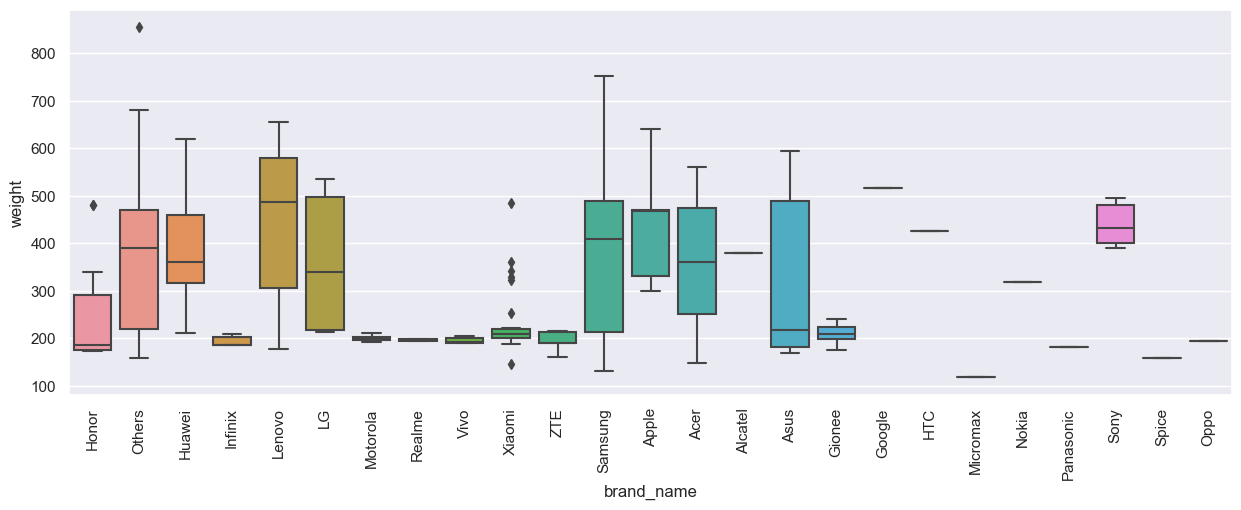

<IPython.core.display.Javascript object>

In [186]:
# Create a boxplot for 'brand_name' and 'weight'
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_large_battery, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

* Among the 34 brands in the dataset, 25 of them offer devices with a large battery capacity (>4500 mAh).
* Devices with a battery capacity greater than 4500 mAh have an average weight of 332.18 grams, compared to the overall average weight of 182.75 grams in the dataset. This demonstrates that larger battery capacity tends to increase the weight of the device.
* Brands like Micromax offer very light devices (less than 120 grams), could be smartphones, still with a large battery capacity.
* Samsung, particularly offers devices with a wide weight range, varying from around 130 grams to 753 grams, while incorporating a large battery.
* There is an unknown brand in the dataset that make devices weighing 855 grams with a significant battery capacity.

#### `normalized_used_price` vs `release_year`

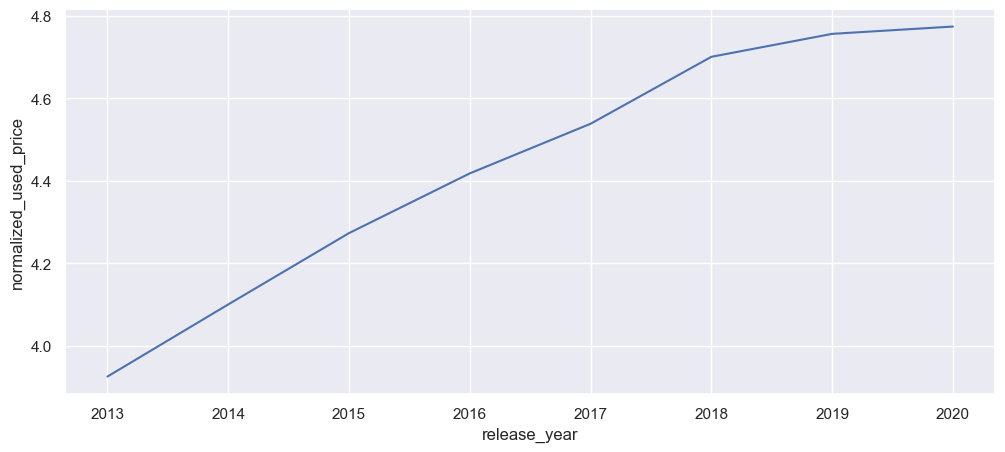

<IPython.core.display.Javascript object>

In [251]:
# Create a lineplot for release year and normalized used price
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="release_year", y="normalized_used_price", ci=None)
plt.show()

* The distribution reveals a clear trend of increasing prices for used devices over the years. 
* There is a significant surge in prices from devices manufactured between 2013 and 2018. The rate of price increase appears to level off from 2018 to 2020, indicating newer devices retain their price more steadily.

#### `normalized_used_price` vs `4g` and `5g`

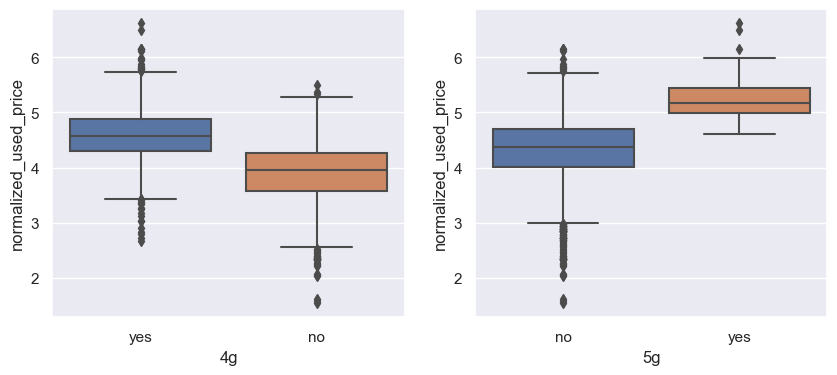

<IPython.core.display.Javascript object>

In [255]:
# Create a boxplot for noramlized_use_price and 4g, 5g respectively
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

* The price of used devices that offer 4G connectivity tends to be higher compared to devices that do not offer 4G.
* The price of used devices that support 5G connectivity is notably higher compared to devices without 5G.
* In general, the price of used devices with 5G is higher than that of used devices with 4G. It is important to note that there are some devices that offer both 4G and 5G options, which may impact their pricing differently.

## Data Preprocessing

### Missing Value Treatment

In [272]:
# Create a copy of the data
df1 = df.copy()

<IPython.core.display.Javascript object>

In [273]:
# Check for missing values
df1.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

- The the missing values in the data can be filled by the column medians grouped by `release_year` and `brand_name`.

In [274]:
# Impute missing values with median by grouping the data on release year and brand name
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["release_year", "brand_name"])[col].transform("median")
    )

# Check for missing values after imputing the above columns
df1.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

* The remaining missing values in the data can be filled by the column medians grouped by `brand_name`.

In [275]:
# Impute the missing values with median by grouping the data on brand name
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["brand_name"])[col].transform("median")
    )

# Check for missing values after imputing the above columns
df1.isna().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

<IPython.core.display.Javascript object>

- The remaining missing values in the `main_camera_mp` column can be filled by the column median.

In [276]:
# Impute the data with median
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

# Check for missing values after imputing the above columns
df1.isna().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

- All the missing values have been treated.

### Feature Engineering



- Create a new column `years_since_release` from the `release_year` column.
- Consider the year of data collection, 2021, as the baseline.
- Drop the `release_year` column.

In [277]:
# Create a new column 'years_since_release
df1["years_since_release"] = 2021 - df1["release_year"]

# Drop the release_year column
df1.drop("release_year", axis=1, inplace=True)

# Check statistical summary of this new column
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

<IPython.core.display.Javascript object>

* The oldest device in this dataset is 8 year old.
* Approximately 50% of the used devices in the dataset were originally released around five and a half years ago.

### Outlier Detection and Treatment

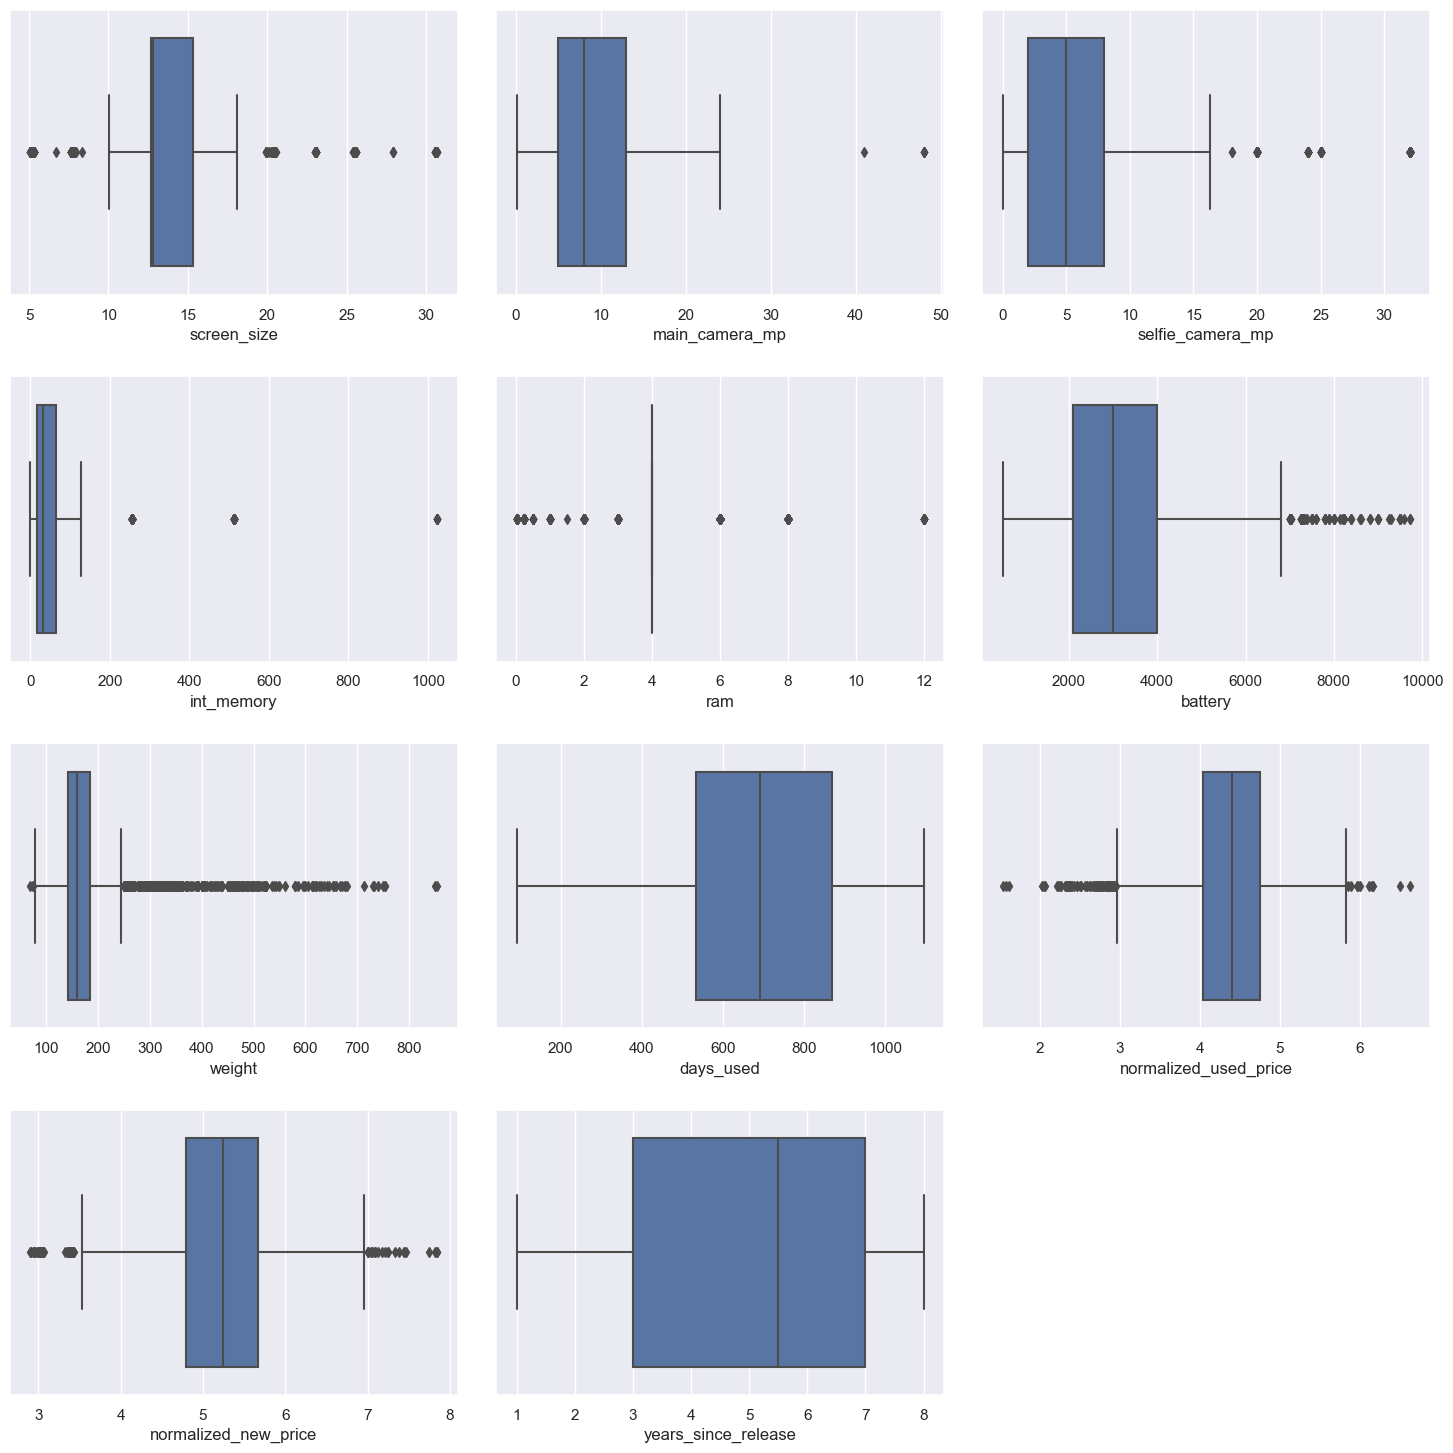

<IPython.core.display.Javascript object>

In [280]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

* All numerical features in the data set have outliers present in them except of `days_used` and `years_since_release`. 
* However, these outliers will not be treated as they are proper values.

## EDA 


* Let's explore the data once again after manipulating it.

**Correlation Check**

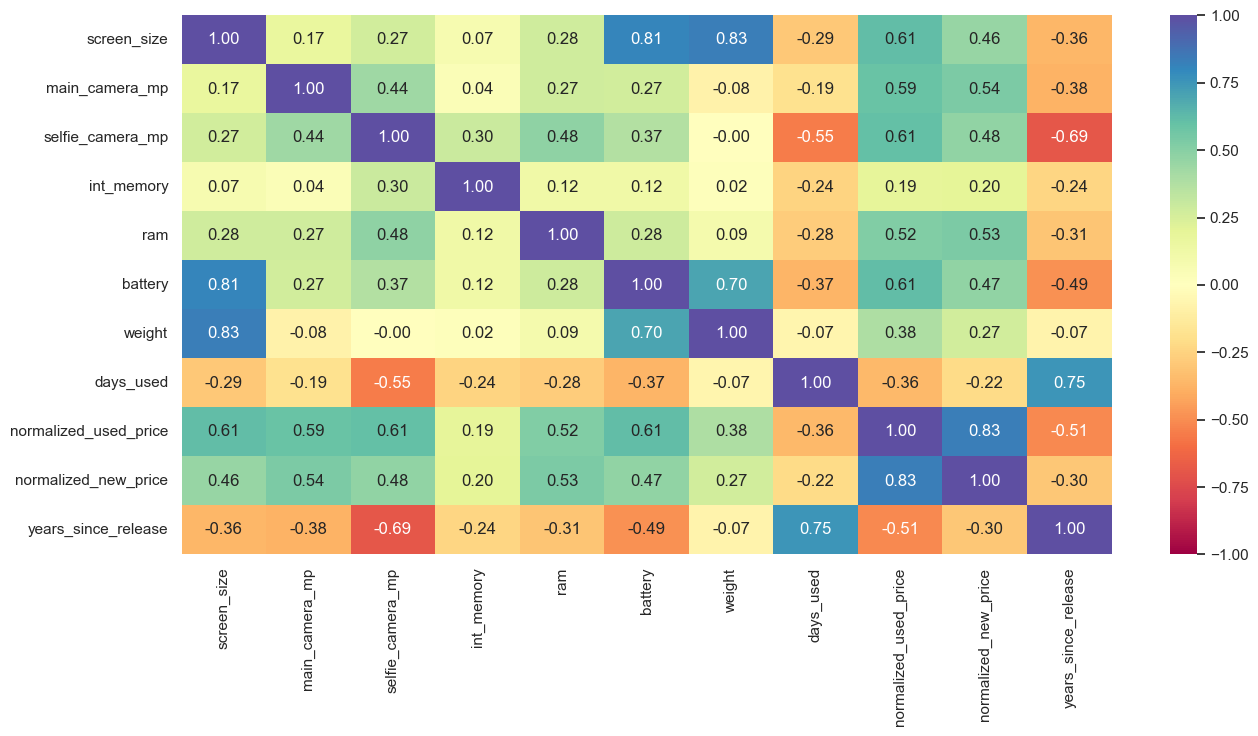

<IPython.core.display.Javascript object>

In [401]:
cols_list = df1.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The correlation between variables remains the same, suggesting that the missing values have been effectively handled and imputed accurately. 
* The years since a device has been released demonstrates a strong positive correlation with the number of days it has been used.
* The years since a device has been released demonstrates a strong negative correlation with its selfie camera resolution. 
* The normalized price of a used device demonstrates a moderate negative correlation with the years since a device has been released.

### Data Preparation for modeling

* We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [285]:
# Define the dependent and independent variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

<IPython.core.display.Javascript object>

In [286]:
# Add the intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [287]:
# Create dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [292]:
# Split the data in 70:30 ratio for train to test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [294]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

## Model Building - Linear Regression

In [295]:
# Fit and print OLS model
olsmod = sm.OLS(y_train, X_train).fit()
print(olsmod.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                           10:54:43   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

### Interpreting the Regression Results: 

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.842**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **1.3156**.


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `screen_size` is **0.0244**.

## Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [296]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [297]:
# Check model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod_train_perf = model_performance_regression(olsmod, X_train, y_train)
olsmod_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


<IPython.core.display.Javascript object>

In [298]:
# Check model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod_test_perf = model_performance_regression(olsmod, X_test, y_test)
olsmod_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


<IPython.core.display.Javascript object>

- The training $R^2$ is 0.845, so the model is not underfitting
- The train and test RMSE and MAE are comparable, so the model is not overfitting either.
- MAE suggests that the model can predict normalized price of a used device within a mean error of 0.185 on the test data.
- MAPE of 4.50 on the test data means that on average, the model's predictions have an absolute percentage error of 4.5% when compared to the actual values in the test dataset, which suggests that the model's prediction is fairly accurate. 

## Checking Linear Regression Assumptions

In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied. We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**
2. **Linearity of variables**
3. **Independence of error terms**
4. **Normality of error terms**
5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY


- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [304]:
# Define a function to check VIF.

from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [305]:
# Check VIF on training data
checking_vif(X_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


<IPython.core.display.Javascript object>

* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

### Removing Multicollinearity


To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

In [306]:
# Define a function to remove multicollinearity


def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmod = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmod.rsquared_adj)
        rmse.append(np.sqrt(olsmod.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [307]:
# Specify the columns with high VIF
col_list = ["screen_size", "weight"]

# Check the effect on model performance after dropping specified columns from train data
res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


<IPython.core.display.Javascript object>

* We will drop `screen_size` since it makes the least change in adjusted R-squared.

In [309]:
# Specify the column to drop
col_to_drop = "screen_size"
X_train1 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test1 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train1)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_since_release,4.730315


<IPython.core.display.Javascript object>

* We have dealt with multicollinearity in the data.
* Let's rebuild the model using the updated set of predictors variables.

In [310]:
# Fit and print OLS model
olsmod1 = sm.OLS(y_train, X_train1).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                           17:49:48   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


- We can see that adj. R-squared has dropped from 0.842 to 0.838, which shows that the dropped columns did not have much effect on the model.
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.

### Dropping high p-value variables 

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.


In [311]:
# initial list of columns
predictors = X_train1.copy()
cols = predictors.columns.tolist()

# set an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


<IPython.core.display.Javascript object>

In [313]:
# Specify the train data from which to select the specified columns
X_train2 = X_train1[selected_features]

# Specify the test data from which to select the specified columns
X_test2 = X_test1[selected_features]

<IPython.core.display.Javascript object>

In [314]:
# Fit and print OLS model on updated dataset (no multicollinearity and no insignificant predictors)
olsmod2 = sm.OLS(y_train, X_train2).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                           18:15:21   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [315]:
# Check model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, X_train2, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


<IPython.core.display.Javascript object>

In [316]:
# Check model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, X_test2, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


<IPython.core.display.Javascript object>



* Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train2* as the final set of predictor variables and *olsmod2* as the final model to move forward with.
* The adjusted R-squared is 0.838, i.e., our model is able to explain ~84% of the variance.
* The adjusted R-squared in *olsmod1* was 0.838 as well.
    * This shows that the variables we dropped were not affecting the model.
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting.

**Now we'll check the rest of the assumptions on *olsmod2*.**

1. **Linearity of variables**
2. **Independence of error terms**
3. **Normality of error terms**
4. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE


- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [317]:
# Create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


<IPython.core.display.Javascript object>

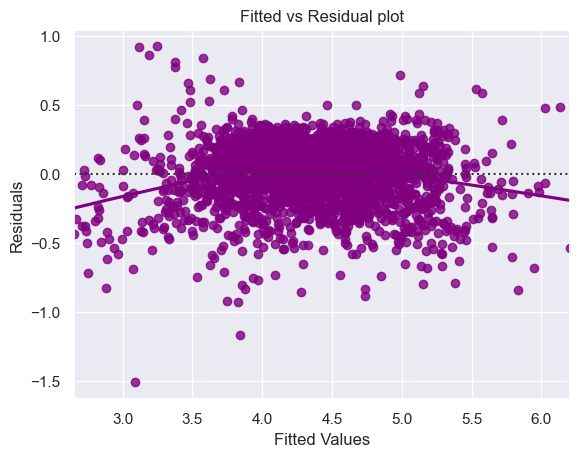

<IPython.core.display.Javascript object>

In [318]:
# Plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()


* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).
* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.
* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

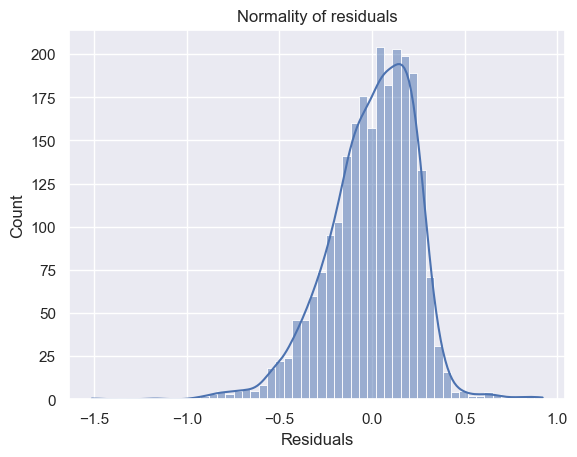

<IPython.core.display.Javascript object>

In [320]:
# Plot the distribution of residuals
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

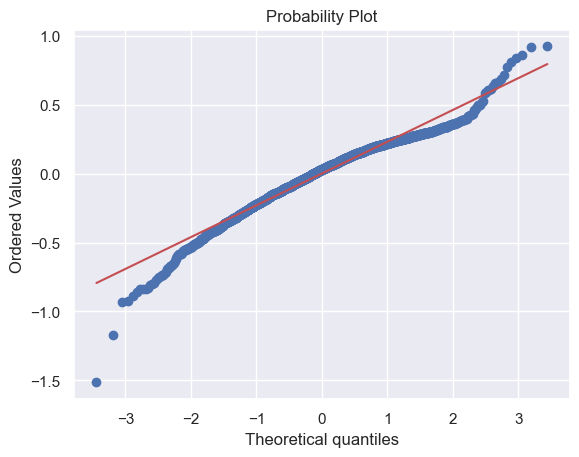

<IPython.core.display.Javascript object>

In [321]:
# Check Q-Q plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* The residuals more or less follow a straight line except for the tails.
* Let's check the results of the Shapiro-Wilk test. The null and alternate hypotheses of the test are as follows:
    - Null hypothesis: Residuals are normally distributed.
    - Alternate hypothesis: Residuals are not normally distributed.


In [322]:
# Apply the Shapiro-Wilks test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995261942370773e-23)

<IPython.core.display.Javascript object>

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **This assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

In [323]:
# Apply the Goldfeldquandt test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train2)
lzip(name, test)

[('F statistic', 1.0087504199106758), ('p-value', 0.4401970650667301)]

<IPython.core.display.Javascript object>

* **Since p-value > 0.05, we can say that the residuals are homoscedastic. This assumption is satisfied.**

## Final Model

In [325]:
X_train_final = X_train2.copy()
X_test_final = X_test2.copy()

<IPython.core.display.Javascript object>

In [326]:
# Fit the final model
olsmodel_final = sm.OLS(y_train, X_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                           16:39:30   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

## Predictions

### Print the linear regression equation.

In [339]:
# Check teh model prarameters
olsmodel_final.params

const                   1.499981
main_camera_mp          0.020967
selfie_camera_mp        0.013827
ram                     0.020713
weight                  0.001662
normalized_new_price    0.441472
years_since_release    -0.029170
brand_name_Karbonn      0.115598
brand_name_Samsung     -0.037423
brand_name_Sony        -0.066993
brand_name_Xiaomi       0.080068
os_Others              -0.127575
os_iOS                 -0.090006
4g_yes                  0.050213
5g_yes                 -0.067259
dtype: float64

<IPython.core.display.Javascript object>

In [345]:
# Write the equation of linear regression
Equation = "normalized_used_price ="
print(Equation, end=" ")
for i in range(len(X_train2.columns)):
    if i == 0:
        print(olsmodel_final.params[i], "+", end="")
    elif i != len(X_train2.columns) - 1:
        print(
            olsmodel_final.params[i],
            "* (",
            X_train2.columns[i],
            ")",
            "+",
            end=" ",
        )
    else:
        print(olsmodel_final.params[i], "* (", X_train2.columns[i], ")")

normalized_used_price = 1.499981245197262 +0.020967228790752745 * ( main_camera_mp ) + 0.013827288876828697 * ( selfie_camera_mp ) + 0.020712701657147132 * ( ram ) + 0.0016616476692228 * ( weight ) + 0.44147230022363765 * ( normalized_new_price ) + -0.029169763671538892 * ( years_since_release ) + 0.11559844506476236 * ( brand_name_Karbonn ) + -0.03742329934072952 * ( brand_name_Samsung ) + -0.06699285130111635 * ( brand_name_Sony ) + 0.0800684069580428 * ( brand_name_Xiaomi ) + -0.12757512561897982 * ( os_Others ) + -0.09000552317648974 * ( os_iOS ) + 0.05021345152978317 * ( 4g_yes ) + -0.06725868426972281 * ( 5g_yes )


<IPython.core.display.Javascript object>

### Making predictions on the test data

In [324]:
# predictions on the test set
pred = olsmod2.predict(X_test2)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.385671
2341,3.696103,4.003934
1913,3.592093,3.643812
688,4.306495,4.103463
650,4.522115,5.113026
2291,4.259294,4.398406
40,4.997685,5.459871
1884,3.875359,4.053143
2538,4.206631,4.035868
45,5.380450,5.227899


<IPython.core.display.Javascript object>

- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable.

In [327]:
# Check model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, X_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


<IPython.core.display.Javascript object>

In [328]:
# Check model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, X_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


<IPython.core.display.Javascript object>

* The model is able to explain ~84% of the variation in the data.
* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.
* The MAPE on the test set suggests we can predict within 4.56% of the used price of a device.
* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes.

## Actionable Insights 

* The model is able to explain ~84% of the variation in the data and within 4.56% of the price of a used device on the test data. This indicates that the model is good for prediction as well as inference purposes.
* If the main camera resolution of a used device increases by one unit, then the normalized price of the used device increases by 0.0210 units, all other variables held constant.
* If the selfie camera resolution of a used device increases by one unit, then the normalized price of the used device increases by 0.0138 units, all other variables held constant.
* If the ram of a used device increases by one unit, then the normalized price of the used device increases by 0.0207 units, all other variables held constant.
* If the weight of a used device increases by one unit, then the normalized price of the used device increases by 0.0017 units, all other variables held constant.
* The price of a new device of the same model is highly correlated with the normalized price of a used device. If the price of a new device of the same model increases by one unit, then its normalized price of a used device increases by 0.4415 units, all other variables held constant.
* If the year of a device since release increases by one unit, then its used price decreases by 0.0292 units, all other variables held constant. Therefore, older devices may experience a more pronounced depreciation in value, while newer devices retain their price more steadily.
* The normalized price for a used devices with 4G connectivity will be 0.0502 units more than those without 4G.
* The normalized price of a used Samsung device will be 0.037 units less than a used Acer device.



## Interesting find:

When catering to customers with specific preferences in their search for a used device, the following information can be valuable:

* Approximately 93% of the devices are powered by the Android operating system. This overwhelming majority underscores the widespread adoption and popularity of Android in the device landscape, highlighting its dominant presence and significance in the market.
* Larger battery capacity tends to increase the weight of the device. However, brands like Xiaomi, Samsung, and Micromax produces fairly light devices with a large battery capacity.
* The Asian brands such as Huawei and Xiaomi, known for their devices with larger screens, also excel in producing devices with high selfie camera resolution. This correlation suggests a strong emphasis from these brands on delivering immersive visual experiences and capturing high-quality selfies. Their commitment to both aspects of the user experience positions them as leaders in the industry. 
* Apple, despite their reputation, do not feature prominently in terms of making large screens, nor high resolution main/selfie cameras.
* Sony, a renowned brand recognized for its expertise in manufacturing high-standard photography cameras, stands out among the brands that produce devices with high resolution main cameras. This highlights Sony's commitment to delivering exceptional camera capabilities and reinforces their reputation in the imaging industry.

## Recommendations 

* When considering the purchase of used or refurbished devices, Recell should prioritize recently released models that offer exceptional features such as high-resolution front and rear cameras, ample RAM, and reliable 4G connectivity. These specifications not only enhance the user experience but also contribute to higher resale values. By choosing devices with these desirable attributes, Recell can maximize the return on investment when it comes to reselling them in the future.
* Recell can take into account the current price of new devices with the same model when considering the purchase of used or refurbished devices. This approach allows for a more informed evaluation of the potential resale value. By considering the original price of a new device, Recell can gauge the value proposition of a used device and make more informed decisions in terms of pricing and potential profitability.